In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler



In [2]:
df = pd.read_csv("uber.csv.xls")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
import haversine as hs
df.dropna(axis=0,inplace=True)
df = df[(df.pickup_latitude<90) & (df.dropoff_latitude<90) &
        (df.pickup_latitude>-90) & (df.dropoff_latitude>-90) &
        (df.pickup_longitude<180) & (df.dropoff_longitude<180) &
        (df.pickup_longitude>-180) & (df.dropoff_longitude>-180)]

# df.isnull().sum()

df["dis"] = [hs.haversine((df["pickup_latitude"][i],df["pickup_longitude"][i]),
                         (df["dropoff_latitude"][i],df["dropoff_longitude"][i]))for i in df.index]
# df.head()

df = df[["dis","fare_amount"]]
df.head()

,dis,fare_amount
0,1.683325,7.5
1,2.457593,7.7
2,5.036384,12.9
3,1.661686,5.3
4,4.475456,16.0


In [4]:
df.describe()

,dis,fare_amount
count,199987.000000,199987.000000
mean,20.560358,11.359849
std,379.621262,9.901868
min,0.000000,-52.000000
25%,1.215169,6.000000
50%,2.120828,8.500000
75%,3.874784,12.500000
max,8782.910738,499.000000


Text(0, 0.5, 'fare_amount')

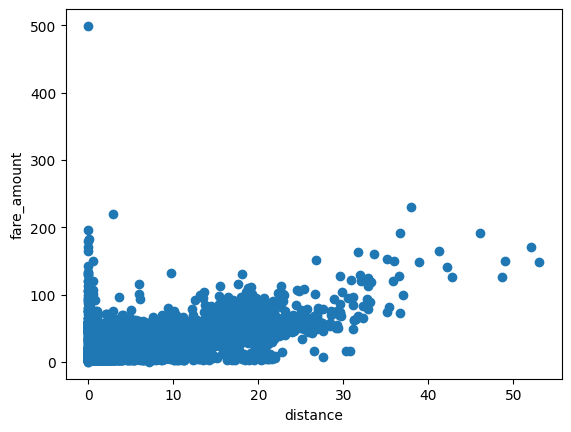

In [5]:
df.drop(df[df['dis'] <= 0].index, inplace = True)
df.drop(df[df['dis'] > 60].index, inplace = True)
df.drop(df[df['fare_amount'] <= 0].index, inplace = True)
x = df["dis"].values.reshape(-1,1)    
y = df["fare_amount"].values.reshape(-1,1)   
plt.scatter(x,y)
plt.xlabel("distance")
plt.ylabel("fare_amount")
# df.describe()




In [6]:
x

array([[ 1.68332508],
       [ 2.45759328],
       [ 5.03638415],
       ...,
       [12.85033687],
       [ 3.53972034],
       [ 5.41779096]])

In [7]:
df.corr()

,dis,fare_amount
dis,1.000000,0.869072
fare_amount,0.869072,1.000000


<AxesSubplot: >

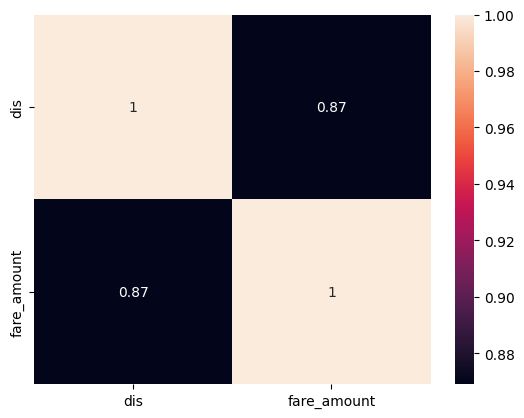

In [8]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.77
Test set score: 0.7247970
